In [1]:
import lasio
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


In [2]:
las = lasio.read("S-KNGM-GM-3_T_133820_0 (2).las")  # Replace with your LAS file path
df = las.df()


In [3]:
print("Raw Data:")
print(df.head())

Raw Data:
                CALI  DT  GR  LLD  LLS  MSFL  NPHI  RHOB  SP
BOREHOLE-DEPTH                                              
15.0830          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN
15.2354          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN
15.3878          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN
15.5402          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN
15.6926          NaN NaN NaN  NaN  NaN   NaN   NaN   NaN NaN


In [4]:
df = df.interpolate().dropna()

In [6]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)

In [7]:
print("\nProcessed Data:")
print(df_scaled.head())



Processed Data:
       CALI        DT        GR       LLD       LLS      MSFL      NPHI  \
0  1.714046 -2.162353 -0.968340 -0.011872 -0.263192 -0.065966  0.885806   
1  1.779525 -2.210951 -0.892297 -0.012027 -0.274033 -0.065329  1.017350   
2  1.963051 -2.259548 -0.882275 -0.012215 -0.286796 -0.067187  1.004101   
3  2.136804 -2.308145 -0.911823 -0.012330 -0.293517 -0.068691  1.090219   
4  2.330798 -2.356742 -0.924431 -0.012349 -0.291476 -0.067480  1.233119   

        RHOB        SP  
0 -10.420349  0.391139  
1 -10.513271  0.391139  
2 -10.522102  0.391139  
3 -10.234890  0.391139  
4  -9.781034  0.391139  


In [8]:
df_scaled['GR_RHOB_ratio'] = df_scaled['GR'] / df_scaled['RHOB']


In [13]:
small_constant = 1e-10  # A small positive value
df_scaled['log_RHOB'] = np.log(df_scaled['RHOB'] + small_constant)

In [14]:
print("\nEnhanced Data with New Features:")
print(df_scaled.head())


Enhanced Data with New Features:
       CALI        DT        GR       LLD       LLS      MSFL      NPHI  \
0  1.714046 -2.162353 -0.968340 -0.011872 -0.263192 -0.065966  0.885806   
1  1.779525 -2.210951 -0.892297 -0.012027 -0.274033 -0.065329  1.017350   
2  1.963051 -2.259548 -0.882275 -0.012215 -0.286796 -0.067187  1.004101   
3  2.136804 -2.308145 -0.911823 -0.012330 -0.293517 -0.068691  1.090219   
4  2.330798 -2.356742 -0.924431 -0.012349 -0.291476 -0.067480  1.233119   

        RHOB        SP  GR_RHOB_ratio  log_RHOB  
0 -10.420349  0.391139       0.092928       NaN  
1 -10.513271  0.391139       0.084873       NaN  
2 -10.522102  0.391139       0.083850       NaN  
3 -10.234890  0.391139       0.089090       NaN  
4  -9.781034  0.391139       0.094513       NaN  


In [15]:
np.random.seed(42)
df_scaled['EOR_Success'] = np.random.choice([0, 1], size=len(df_scaled))


In [16]:
X = df_scaled.drop(columns=['EOR_Success'])  # Features
y = df_scaled['EOR_Success']  # Target

In [20]:
from sklearn.impute import SimpleImputer

# Create an imputer object with a strategy
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent', etc.

# Fit the imputer on the training data and transform both training and test data
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now fit the model with the imputed data
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_imputed, y_train)

RandomForestClassifier(random_state=42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Example data (Replace with your actual data)
# X = feature matrix
# y = target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and classification
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Train the model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print(f"\nModel Accuracy: {accuracy}")


Model Accuracy: 0.5035366931918656


In [23]:
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       0.49      0.52      0.51      1106
           1       0.52      0.49      0.50      1156

    accuracy                           0.50      2262
   macro avg       0.50      0.50      0.50      2262
weighted avg       0.50      0.50      0.50      2262



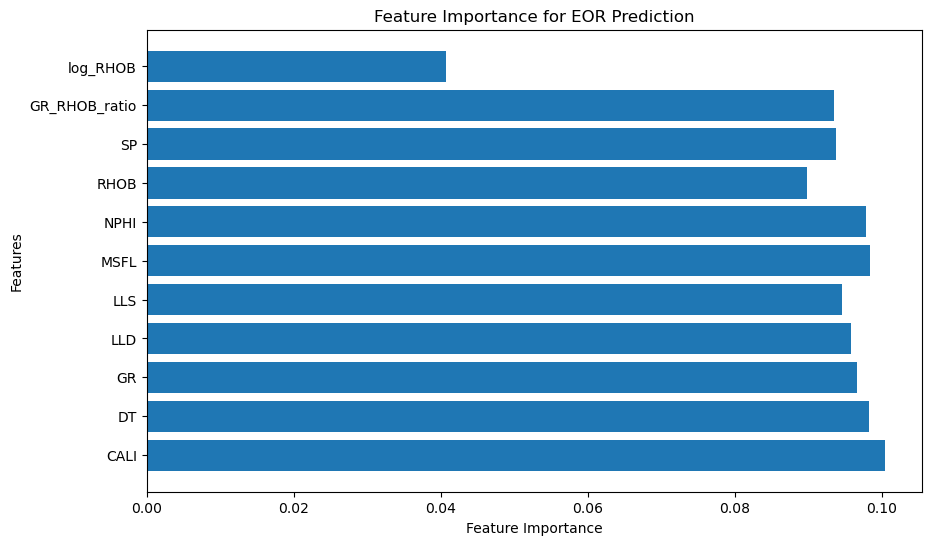

In [24]:
importance = model.feature_importances_
plt.figure(figsize=(10, 6))
plt.barh(X.columns, importance)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance for EOR Prediction')
plt.show()

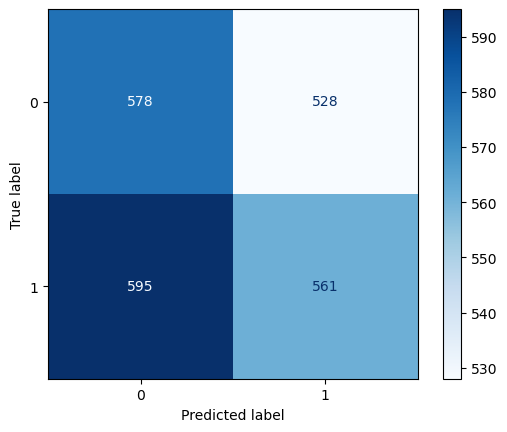

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [27]:
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

# Example data (Replace with your actual data)
# X = feature matrix
# y = target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a pipeline with imputation and feature selection
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('feature_selection', SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42), threshold="mean")),  # Feature selection
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))  # Train the model
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Transform the test data
X_test_reduced = pipeline.named_steps['feature_selection'].transform(pipeline.named_steps['imputer'].transform(X_test))

# Predict on the test set
y_pred_reduced = pipeline.named_steps['classifier'].predict(X_test_reduced)

# Calculate accuracy
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"\nReduced Model Accuracy: {accuracy_reduced}")


Reduced Model Accuracy: 0.4964633068081344


In [29]:
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score

# Example data (Replace with your actual data)
# X = feature matrix
# y = target vector

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define parameter grid
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20, 30],
}

# Create a pipeline with imputation and RandomForestClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('classifier', RandomForestClassifier(random_state=42))  # Random Forest model
])

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=pipeline, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

# Test the best model
best_model = grid_search.best_estimator_
y_pred_reduced = best_model.predict(X_test)
accuracy_reduced = accuracy_score(y_test, y_pred_reduced)
print(f"\nReduced Model Accuracy: {accuracy_reduced}")


Best parameters found:  {'classifier__max_depth': None, 'classifier__n_estimators': 200}
Best accuracy found:  0.49938985245656314

Reduced Model Accuracy: 0.4964633068081344
